## Method for dealing with outliers:

1. train
2. remove outliers (~10% of data) (wiht largest residual error)
3. re-train

2 and 3 can be repeated

## Outliers Mini-Project

This project has two parts. In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

### Slope of Regression with Outliers

Sebastian described to us an algorithm for improving a regression, which you will implement in this project. You will work through it in the next few quizzes. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.

Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. 

https://github.com/mudspringhiker/ud120-projects/tree/master/outliers

A few outliers should clearly pop out. Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know this because we used this value to generate the data); what slope does your regression have?


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# from outlier_cleaner import outlierCleaner

Load up some practice data with outliers in it:

In [3]:
ages = pickle.load(open("../ud120-projects/outliers/practice_outliers_ages.pkl", "r"))

In [4]:
print ages

[49, 21, 32, 30, 53, 51, 61, 23, 39, 21, 30, 43, 21, 29, 49, 45, 30, 47, 57, 20, 57, 52, 35, 27, 64, 35, 24, 24, 58, 47, 57, 53, 44, 64, 37, 45, 58, 48, 59, 46, 52, 22, 30, 33, 23, 30, 24, 32, 49, 36, 37, 29, 32, 63, 49, 48, 27, 53, 27, 37, 65, 49, 45, 51, 58, 55, 30, 21, 34, 32, 29, 63, 60, 34, 50, 38, 62, 41, 32, 31, 45, 32, 46, 61, 38, 30, 65, 43, 24, 22, 25, 48, 56, 39, 22, 37, 65, 44, 64, 59]


In [5]:
net_worths = pickle.load(open("../ud120-projects/outliers/practice_outliers_net_worths.pkl", "r"))

In [6]:
print net_worths

[316.18428306022463, 128.4847139765763, 212.95377076201385, 217.96059712816052, 326.56693250553326, 314.0672608610164, 412.83425631014785, 159.09869458305818, 234.36051228130097, 142.1012008717193, 178.23164614375077, 259.43540492859483, 136.08924543132068, 142.98439510684403, 271.75164334973937, 270.00424941518054, 167.24337759331152, 300.0349466519055, 338.08951848957577, 96.75392597329417, 385.5629753784311, 320.4844739902693, 220.10056409375846, 140.25503627573087, 389.1123455094963, 220.96845179419734, 126.98012845155395, 157.51396036691344, 350.4872262016239, 287.91612500413447, 344.21586775541203, 368.29556369017877, 274.7300555052413, 378.84578142088196, 247.70089824206377, 256.83312700057957, 366.6772719000951, 260.8065975224045, 342.1862790220314, 291.4372247173825, 339.7693315999082, 140.9273656237994, 185.1870343522352, 200.22792608821422, 114.17956019265145, 173.10311583210583, 140.78722458080426, 221.1424445243783, 313.12236579136925, 189.73919689274533, 237.7316793878959

Ages and net_worths need to be reshaped into 2D numpy arrays. 

The second argument of reshape command is a tuple of integers: n_rows, n_columns. By convention, n_rows is the number of data points and n_columns is the number of features.

In [7]:
ages = np.reshape(np.array(ages), (len(ages), 1))

In [8]:
ages

array([[49],
       [21],
       [32],
       [30],
       [53],
       [51],
       [61],
       [23],
       [39],
       [21],
       [30],
       [43],
       [21],
       [29],
       [49],
       [45],
       [30],
       [47],
       [57],
       [20],
       [57],
       [52],
       [35],
       [27],
       [64],
       [35],
       [24],
       [24],
       [58],
       [47],
       [57],
       [53],
       [44],
       [64],
       [37],
       [45],
       [58],
       [48],
       [59],
       [46],
       [52],
       [22],
       [30],
       [33],
       [23],
       [30],
       [24],
       [32],
       [49],
       [36],
       [37],
       [29],
       [32],
       [63],
       [49],
       [48],
       [27],
       [53],
       [27],
       [37],
       [65],
       [49],
       [45],
       [51],
       [58],
       [55],
       [30],
       [21],
       [34],
       [32],
       [29],
       [63],
       [60],
       [34],
       [50],
       [38],
       [62],

In [9]:
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

In [10]:
net_worths

array([[ 316.18428306],
       [ 128.48471398],
       [ 212.95377076],
       [ 217.96059713],
       [ 326.56693251],
       [ 314.06726086],
       [ 412.83425631],
       [ 159.09869458],
       [ 234.36051228],
       [ 142.10120087],
       [ 178.23164614],
       [ 259.43540493],
       [ 136.08924543],
       [ 142.98439511],
       [ 271.75164335],
       [ 270.00424942],
       [ 167.24337759],
       [ 300.03494665],
       [ 338.08951849],
       [  96.75392597],
       [ 385.56297538],
       [ 320.48447399],
       [ 220.10056409],
       [ 140.25503628],
       [ 389.11234551],
       [ 220.96845179],
       [ 126.98012845],
       [ 157.51396037],
       [ 350.4872262 ],
       [ 287.916125  ],
       [ 344.21586776],
       [ 368.29556369],
       [ 274.73005551],
       [ 378.84578142],
       [ 247.70089824],
       [ 256.833127  ],
       [ 366.6772719 ],
       [ 260.80659752],
       [ 342.18627902],
       [ 291.43722472],
       [ 339.7693316 ],
       [ 140.927

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

Fill in a regression here!  Name the regression object reg so that the plotting code below works, and you can see what your regression looks like

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

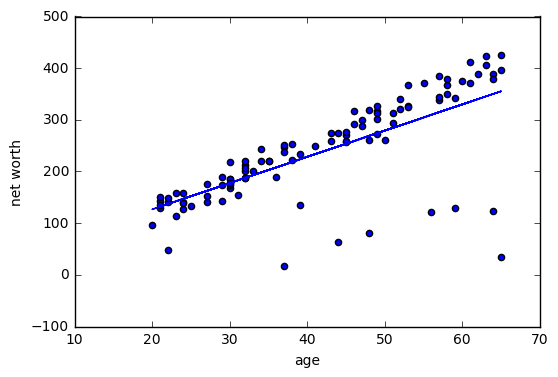

In [15]:
try:
    plt.plot(ages, reg.predict(ages), color='blue')
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.ylabel('net worth')
plt.xlabel('age')
plt.show()

Coefficient:

In [19]:
round(reg.coef_, 3)

5.078

R^2:

In [20]:
round(reg.score(ages_test, net_worths_test), 3)

0.878

### Slope after cleaning

https://github.com/mudspringhiker/ud120-projects/blob/master/outliers/outlier_cleaner.py

In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 

Once this cleaning function is working, you should see the regression result changes. What is the new slope? Is it closer to the “correct” result of 6.25?

In [21]:
predictions = reg.predict(ages_train)

In [23]:
len(predictions)

90

In [30]:
type(net_worths_train)

numpy.ndarray

In [26]:
type(predictions)

numpy.ndarray

In [31]:
len(net_worths_train)

90

In [32]:
error = abs(predictions - net_worths_train)

In [33]:
error

array([[  2.34374503e+01],
       [  2.95637995e+01],
       [  4.59332097e+01],
       [  2.86481987e+01],
       [  1.82744379e+01],
       [  3.22265869e+01],
       [  4.91992199e+01],
       [  1.68646751e+01],
       [  4.24268037e+00],
       [  7.39552180e+01],
       [  4.96749100e+01],
       [  7.67556106e+00],
       [  2.01002285e+01],
       [  7.63909350e+00],
       [  6.06197228e-01],
       [  1.62873489e+01],
       [  5.05069166e+01],
       [  3.21085239e+02],
       [  1.02546358e+01],
       [  4.43976191e+01],
       [  1.58743657e+01],
       [  3.34386424e+01],
       [  8.30817205e-02],
       [  3.07572273e+01],
       [  8.88356217e+01],
       [  2.98827765e+01],
       [  8.51185672e+00],
       [  6.63785936e+01],
       [  3.11622650e+00],
       [  1.03045633e+01],
       [  1.82763278e+01],
       [  3.46074429e+01],
       [  1.70962682e+01],
       [  1.96585667e+02],
       [  1.04336034e+01],
       [  3.00147084e+01],
       [  1.94384493e+01],
 

In [90]:
def outlierCleaner(predictions, ages, net_worths):
    """
    Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth.
    
    Return a list of tuples named cleaned_data where
    each tuple is of the form (age, net_worth, error.)"""
    
    cleaned_data=[]
    
    error = abs(net_worths - predictions)
    age_net_worth_error = np.hstack((ages, net_worths, error))
    age_net_worth_error_list = age_net_worth_error.tolist()
    
    from operator import itemgetter
    age_net_worth_error_list.sort(key=itemgetter(2))
    age_net_worth_error_clean = age_net_worth_error_list[:int(0.90 * (len(age_net_worth_error_list)))]
    for item in age_net_worth_error_clean:
        cleaned_data.append(tuple(item))
        
    return cleaned_data

In [91]:
cleaned_data = []

In [92]:
cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)

In [93]:
len(cleaned_data)

81

#### Fitting the cleaned data

In [94]:
ages, net_worths, errors = zip(*cleaned_data)

In [96]:
ages = np.reshape(np.array(ages), (len(ages), 1))

In [97]:
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

In [98]:
reg.fit(ages, net_worths)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

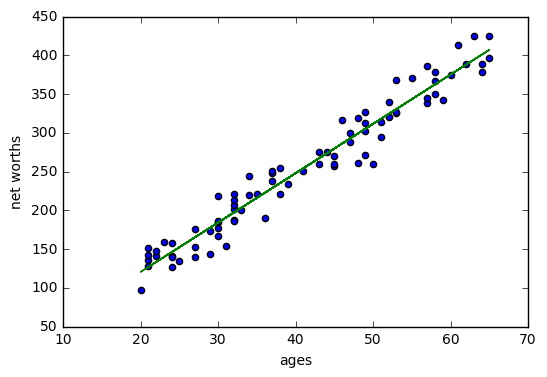

In [102]:
plt.plot(ages, reg.predict(ages), color="green")
plt.scatter(ages, net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

In [101]:
round(reg.coef_, 3)

6.369

In [106]:
round(reg.score(ages_test, net_worths_test), 3)

0.983

In [108]:
round(reg.intercept_, 3)

-6.919